# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Juan Sebastian Buitrago Díaz
*Métodos computacionales 2025-I*

---

In [55]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

In [56]:
def Euler(f, x0, y0, h, x_end):
    """
    Implementa el método de Euler para resolver una Ecuación Diferencial Ordinaria (EDO) de primer orden.
    y(xn + 1) = y(xn) + h * f(xn, yn)

    Args:
        f: La función que define la EDO, dy/dx = f(x, y). Debe aceptar dos argumentos: x e y. -> Callable
        x0: La condición inicial para la variable independiente (x). -> float
        y0: La condición inicial para la variable dependiente (y) en x0. -> float
        h: El tamaño del paso (incremento en x) para la iteración. -> float
        x_end: El valor final de x hasta donde se desea aproximar la solución. -> float

    Returns:
        Una tupla (x, y) donde:
        x: Un arreglo numpy con los valores de x en cada paso. -> Array
        y: Un arreglo numpy con las aproximaciones de y correspondientes a cada valor de x. -> Array
    """
    # Calcular el número de pasos necesarios para ir de x0 a x_end con un tamaño de paso h.
    n_steps = int((x_end - x0) / h)

    # Inicializar arreglos numpy para almacenar los valores de x e y en cada paso.
    # Se crea un espacio para n_steps + 1 puntos, incluyendo el punto inicial.
    x = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)

    # Establecer la condición inicial en el primer elemento de los arreglos.
    x[0] = x0
    y[0] = y0

    # Iterar sobre el número de pasos para aplicar la fórmula del método de Euler.
    for i in range(n_steps):
        # Calcular el siguiente valor de x sumando el tamaño del paso h al valor actual de x.
        x[i+1] = x[i] + h
        # Aplicar la fórmula del método de Euler para calcular la aproximación del siguiente valor de y:
        # y[i+1] = y[i] + h * f(x[i], y[i])
        # donde f(x[i], y[i]) es la pendiente en el punto actual (x[i], y[i]) según la EDO.
        y[i+1] = y[i] + h * f(x[i], y[i])

    # Devolver los arreglos de valores de x e y calculados.
    return x, y

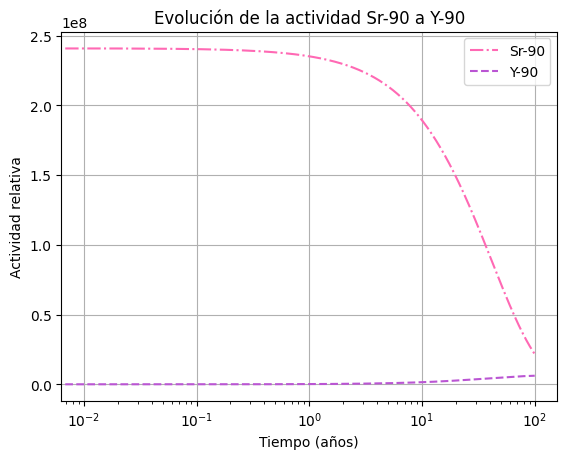

In [57]:
tvm_sr = 28.78
tvm_y  = 2.67 * 365.25

lambda_sr = np.log(2) / tvm_sr
lambda_y  = np.log(2) / tvm_y

sr_o = 1e10
y_o  = 0
h = 0.01
t_f = 100

def dSr_dt(t, sr):
  return -lambda_sr * sr

t_i, sr_i = Euler(dSr_dt, 0, sr_o, h, t_f)
y_i = np.zeros_like(sr_i)
y_i[0] = y_o

def dY_dt(t, y):
  return -lambda_y * y - dSr_dt(t_i[k], sr_i[k])

for k in range(len(t_i) - 1):
   y_i[k+1] = y_i[k] + h * dY_dt(t_i[k], y_i[k])

sr_f = lambda_sr * sr_i
y_f  = lambda_y  * y_i

plt.plot(t_i, sr_f, label='Sr-90', color= 'hotpink', ls="-.")
plt.plot(t_i, y_f,  label='Y-90', color = 'mediumorchid', ls='--')
plt.title('Evolución de la actividad Sr-90 a Y-90')
plt.xlabel('Tiempo (años)')
plt.ylabel('Actividad relativa')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()


# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

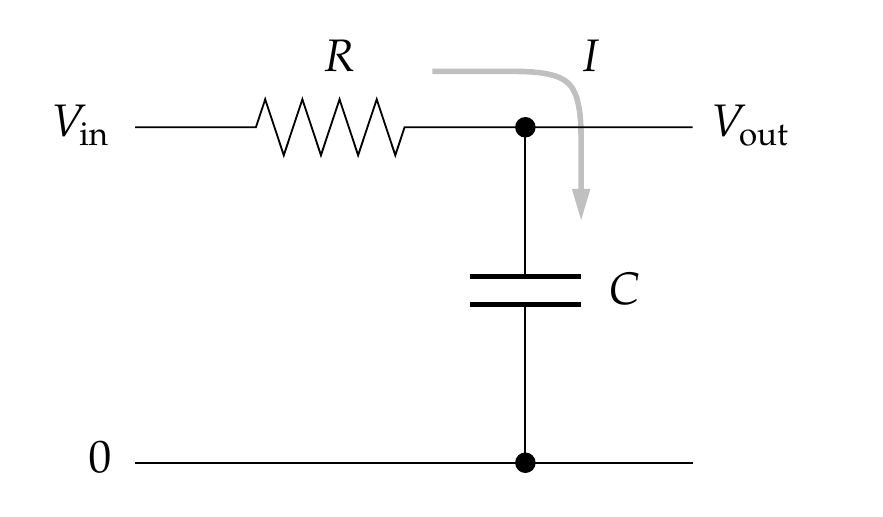

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

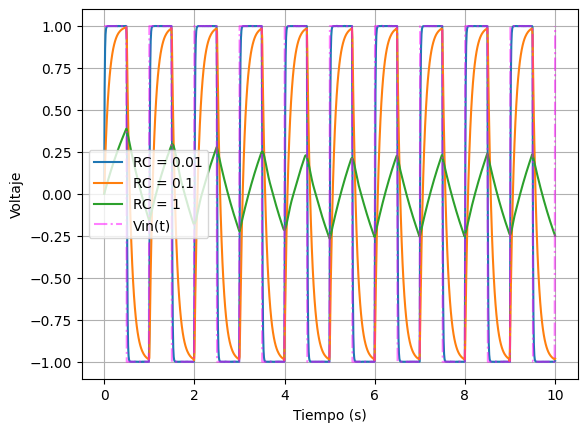

In [58]:
RC_i = [0.01, 0.1, 1]
t_o = 0
t_f = 10
t_i = np.linspace(t_o, t_f, 1000)
V_out0 = [0]

def V_in(t):
  return 1 if int(2 * t) % 2 == 0 else -1

for RC in RC_i:
  def func(t, V_out):
    return (1 / RC) * (V_in(t) - V_out)
  sol = solve_ivp(func, (t_o, t_f), V_out0, method='RK45', t_eval=t_i)
  plt.plot(sol.t, sol.y[0],label=f'RC = {RC}')
plt.plot(t_i, [V_in(t) for t in t_i], color="magenta", ls="-.",label='Vin(t)', alpha=0.5)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje")
plt.legend()
plt.grid()
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

In [59]:
def my_logistic_eq(t, P, r, K):
  return r * P * (1 - P / K)

def sol_eq(t, P0, r, K):
  return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))

def euler_method(f, t0, tf, y0, h, r, K):
  t_i = np.arange(t0, tf + h, h)
  y_i = np.zeros_like(t_i)
  y_i[0] = y0
  for i in range(len(t_i) - 1):
    y_i[i+1] = y_i[i] + h * f(t_i[i], y_i[i], r, K)
  return t_i, y_i

def rk4_method(f, t0, tf, y0, h, r, K):
  t_i = np.arange(t0, tf + h, h)
  y_i = np.zeros_like(t_i)
  y_i[0] = y0
  for i in range(len(t_i) - 1):
      k1 = f(t_i[i], y_i[i], r, K)
      k2 = f(t_i[i] + h/2, y_i[i] + h*k1/2, r, K)
      k3 = f(t_i[i] + h/2, y_i[i] + h*k2/2, r, K)
      k4 = f(t_i[i] + h, y_i[i] + h*k3, r, K)
      y_i[i+1] = y_i[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
  return t_i, y_i

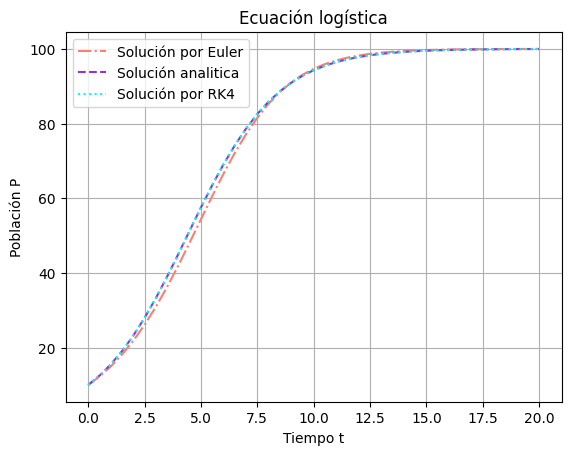

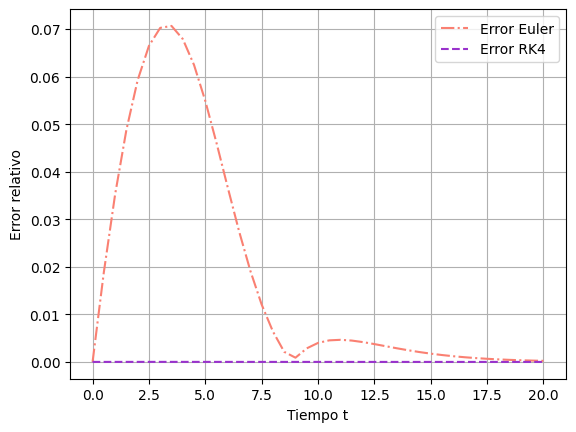

In [60]:
r = 0.5
K = 100
P0 = 10
t0, tf, h = 0, 20, 0.5

t_euler, P_euler = euler_method(my_logistic_eq, t0, tf, P0, h, r, K)
t_rk4, P_rk4 = rk4_method(my_logistic_eq, t0, tf, P0, h, r, K)
P_sol = sol_eq(t_rk4, P0, r, K)

error_euler = np.abs((P_euler - sol_eq(t_euler, P0, r, K)) /P_sol)
error_rk4 = np.abs((P_rk4 - P_sol) / P_sol)

plt.plot(t_euler, P_euler, color="salmon",ls="-.", label="Solución por Euler")
plt.plot(t_rk4, P_sol, color="darkorchid",ls="--", label="Solución analitica")
plt.plot(t_rk4, P_rk4, color="cyan",ls=":", label="Solución por RK4")
plt.title("Ecuación logística")
plt.xlabel("Tiempo t")
plt.ylabel("Población P")
plt.legend()
plt.grid()
plt.show()

plt.plot(t_euler, error_euler, color="salmon",ls="-.", label="Error Euler")
plt.plot(t_rk4, error_rk4, color="darkorchid",ls="--", label="Error RK4")
plt.xlabel("Tiempo t")
plt.ylabel("Error relativo")
plt.legend()
plt.grid()
plt.show()

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=2 \pi \sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [ ]:
def f(t, y):
  return [y[1], -(g/l)*np.sin(y[0])]

def K(alpha):
  integrando = lambda z: 1/np.sqrt((1 - z**2)*(1 - alpha*z**2))
  return quad(integrando, 0, 1)[0]

def T_analitico(u0):
  alpha = np.sin(u0/2)**2
  return T0 * (2/np.pi) * K(alpha)

def T_numerico(t, u, v):
  t_max = []
  for i in range(1, len(v)):
    if v[i-1] > 0 and v[i] <= 0:  #máximo local
      t_c = t[i-1] + (0-v[i-1])*(t[i]-t[i-1])/(v[i]-v[i-1])
      t_max.append(t_c)
  if len(t_max) >= 2:
    return np.mean(np.diff(t_max))
  else:
    return np.nan

u0 = 1.000 rad
T analítico = 2.139138 s
T numérico  = 2.139138 s

u0 = 1.571 rad
T analítico = 2.367842 s
T numérico  = 2.367842 s



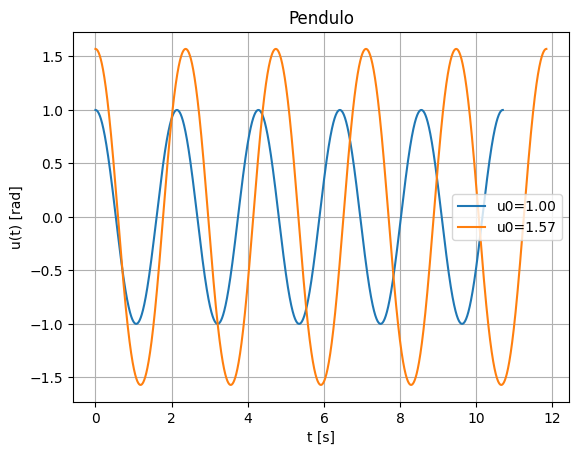

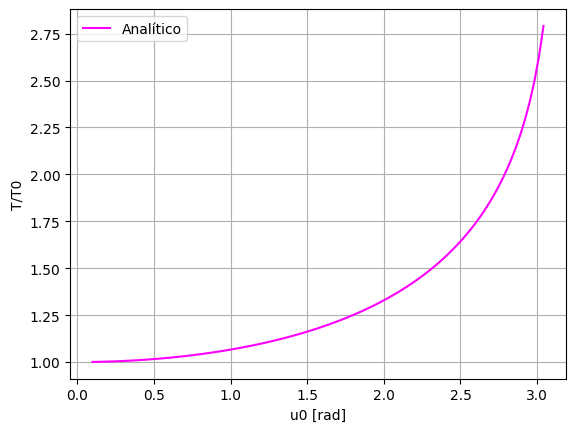

In [62]:
g = 9.81
l = 1.0
h = 0.001
T0 = 2*np.pi*np.sqrt(l/g)
amplitudes = [1.0, np.pi/2]

for u0 in amplitudes:
  T_est = T_analitico(u0)
  t_eval = np.arange(0, 5*T_est, h)
  sol = solve_ivp(f, [0, 5*T_est], [u0, 0], t_eval=t_eval, max_step=h)

  t = sol.t
  u = sol.y[0]
  v = sol.y[1]

  T_an = T_analitico(u0)
  T_num = T_numerico(t, u, v)

  print(f"u0 = {u0:.3f} rad")
  print(f"T analítico = {T_an:.6f} s")
  print(f"T numérico  = {T_num:.6f} s\n")

  plt.plot(t, u, label=f"u0={u0:.2f}")
  plt.xlabel("t [s]")
  plt.ylabel("u(t) [rad]")
  plt.grid()
plt.title("Pendulo")
plt.legend()
plt.grid()
plt.show()

u0s = np.linspace(0.1, np.pi-0.1, 100)
TT0_anal = [T_analitico(u0)/T0 for u0 in u0s]

plt.plot(u0s, TT0_anal,  color = 'magenta', label="Analítico")
plt.xlabel("u0 [rad]")
plt.ylabel("T/T0")
plt.legend()
plt.grid()
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

In [15]:
def Euler_OrdenSuperior(f, t0, tf, Y0, h):
    '''
    Resuelve una ecuación diferencial de orden superior usando el método de Euler explícito.

    Parámetros:
    ----------
    f : callable
        Función que define el sistema de primer orden: f(t, Y) devuelve dY/dt.
        Se asume que Y contiene las derivadas [y, y', y'', ..., y^{(m-1)}].

    t0 : float
        Tiempo inicial.

    tf : float
        Tiempo final.

    Y0 : array_like
        Vector de condiciones iniciales. Ejemplo: [y0, y0', y0'', ..., y0^{(m-1)}].

    h : float
        Tamaño del paso de integración.

    Retorna:
    -------
    t : ndarray, shape (N,)
        Arreglo con los puntos de tiempo: t[0] = t0, t[1] = t0 + h, ..., t[-1] = tf.

    Yn : ndarray, shape (m, N)
        Matriz donde cada fila corresponde a una derivada:
        - Yn[0, :] ≈ y(t)
        - Yn[1, :] ≈ y'(t)
        - ...
        - Yn[m-1, :] ≈ y^{(m-1)}(t)
    '''

    # Número total de pasos de integración (nodos)
    nodos = int((tf - t0) / h)

    # Orden del sistema (dimensión del vector de estado Y)
    m = len(Y0)

    # Arreglo de tiempos con nodos+1 puntos
    t = np.zeros(nodos + 1)

    # Matriz para guardar las soluciones:
    # Cada fila es una derivada, cada columna es un instante de tiempo
    Yn = np.zeros((m, nodos + 1))

    # Condiciones iniciales
    t[0] = t0
    Yn[:, 0] = Y0

    # Iteración del método de Euler
    for k in range(nodos):
        t[k + 1] = t[k] + h                           # Paso en el tiempo
        Yn[:, k + 1] = Yn[:, k] + h * f(t[k], Yn[:, k])  # Paso de Euler

    return t, Yn

#Runge Kutta orden 2
def RK2_PuntoMedio(f, t0, tf, Y0, h):
    '''
    Método de Runge-Kutta de segundo orden (punto medio) para sistemas de EDOs.

    Parámetros:
    ----------
    f : callable
        Función que define el sistema de primer orden: f(t, Y) → dY/dt.
        Debe aceptar un escalar t y un vector Y con las derivadas [y, y', ..., y^{(m-1)}].

    t0 : float
        Tiempo inicial.

    tf : float
        Tiempo final.

    Y0 : array_like
        Vector de condiciones iniciales. Ejemplo: [y0, y0', ..., y0^{(m-1)}].

    h : float
        Tamaño del paso de integración.

    Retorna:
    -------
    t : ndarray, shape (N,)
        Vector de tiempos: t[0] = t0, ..., t[-1] = tf.
Y : ndarray, shape (m, N)
        Matriz de soluciones. Cada fila representa una derivada:
        - Y[0, :] ≈ y(t)
        - Y[1, :] ≈ y'(t)
        - ...
        - Y[m-1, :] ≈ y^{(m-1)}(t)
    '''

    # Número total de pasos de integración
    nodos = int((tf - t0) / h)

    # Orden del sistema (longitud del vector Y0)
    m = len(Y0)

    # Inicialización del vector de tiempos
    t = np.zeros(nodos + 1)

    # Inicialización de la matriz solución:
    # filas: derivadas [y, y', ..., y^{(m-1)}]; columnas: instantes de tiempo
    Y = np.zeros((m, nodos + 1))

    # Asignar condiciones iniciales
    t[0] = t0        # Tiempo inicial
    Y[:, 0] = Y0     # Estado inicial (vector de derivadas)

    # Iteración principal del método de Runge-Kutta de segundo orden
    for k in range(nodos):
        t[k + 1] = t[k] + h  # Avanza el tiempo al siguiente paso

        # Primer estimador de pendiente: en el punto inicial
        k1 = f(t[k], Y[:, k])
        # Segundo estimador: evalúa en el punto medio con k1
        k2 = f(t[k] + h/2, Y[:, k] + h/2 * k1)

        # Actualización del estado con el segundo estimador (punto medio)
        Y[:, k + 1] = Y[:, k] + h * k2

    return t, Y

#Runge Kutta orden 4
def RK4(f, t0, tf, Y0, h):
    """
    Realiza la integración de un sistema de EDO en el intervalo [t0, tf]
    usando el método de Runge–Kutta de orden 4.

    Entradas:
        f (callable): función f(t, y) que devuelve dy/dt como array de dimensión m.
        t0 (float): tiempo inicial.
        tf (float): tiempo final.
        Y0 (array_like): condición inicial y(t0), vector de dimensión m.
        h (float): paso de integración.

    Salidas:
        tn (ndarray): array de tiempos t₀, t₁, …, tₙ con paso h.
        Yn (ndarray): array de soluciones y[:, k] ≈ y(tₖ), forma (m, n+1).
    """
    n = int((tf - t0) / h)                     # número de pasos
    tn = np.zeros(n + 1, dtype=float)          # vector de tiempos t₀…tₙ
    m = len(Y0)                                # dimensión del sistema
    Yn = np.zeros((m, n + 1), dtype=float)     # matriz y[:,k] ≈ y(tₖ)

    tn[0]    = t0                              # tiempo inicial
    Yn[:, 0] = Y0                              # condición inicial y(t₀)

    for k in range(n):
        t_k = tn[k]                            # extraigo tₖ
        y_k = Yn[:, k]                         # extraigo yₖ

        # calculo de los cuatro estimadores
        k1 = h * f(t_k,           y_k)         # pendiente en el inicio
        k2 = h * f(t_k + h/2,     y_k + k1/2)  # pendiente a mitad con k1
        k3 = h * f(t_k + h/2,     y_k + k2/2)  # pendiente a mitad con k2
        k4 = h * f(t_k + h,       y_k + k3)    # pendiente al final

        # combinación de estimadores para yₖ₊₁
        Yn[:, k + 1] = y_k + (k1 + 2*k2 + 2*k3 + k4) / 6
        tn[k + 1]   = t_k + h                  # actualizar tiempo

    return tn, Yn                              # devolver tiempos y soluciones

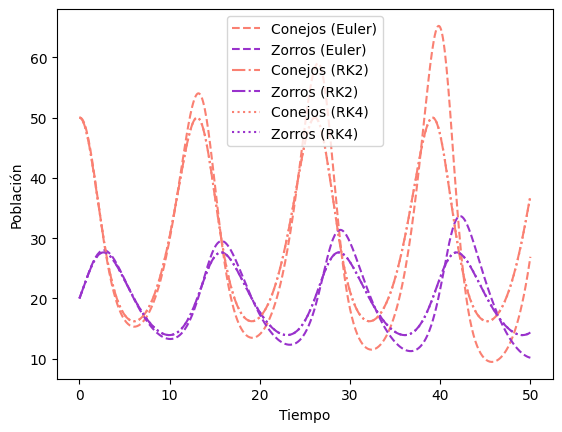

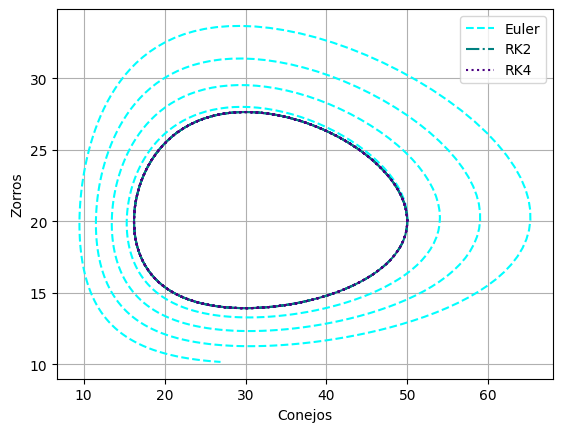

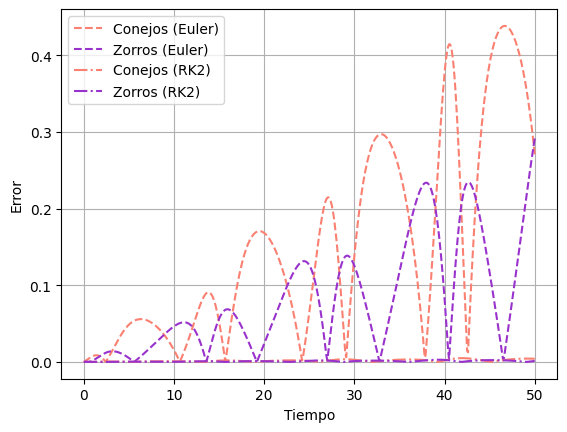

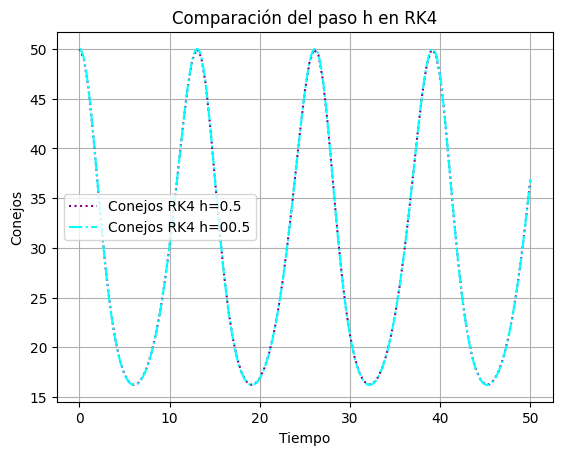

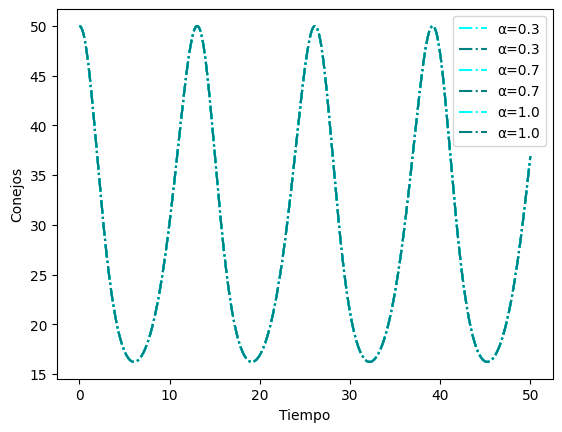

In [29]:
alpha, beta, gamma, delta = 0.8, 0.04, 0.3, 0.01

def f(t, Y):
    x, y = Y
    dxdt = alpha*x - beta*x*y
    dydt = -gamma*y + delta*x*y
    return np.array([dxdt, dydt])

Y0 = [50, 20]
t0, tf = 0, 50
h = 0.1

t_euler, Y_euler = Euler_OrdenSuperior(f, t0, tf, Y0, h)

t_rk2,   Y_rk2   = RK2_PuntoMedio(f, t0, tf, Y0, h)
t_rk4,   Y_rk4   = RK4(f, t0, tf, Y0, h)

error_euler = np.abs(Y_euler - Y_rk4) / np.abs(Y_rk4)
error_rk2 = np.abs(Y_rk2 - Y_rk4) / np.abs(Y_rk4)

plt.plot(t_euler, Y_euler[0], color="salmon",ls="--", label='Conejos (Euler)')
plt.plot(t_euler, Y_euler[1], color="darkorchid",ls="--", label='Zorros (Euler)')
plt.plot(t_rk2,   Y_rk2[0],   color="salmon",ls="-.", label='Conejos (RK2)')
plt.plot(t_rk2,   Y_rk2[1],   color="darkorchid",ls="-.", label='Zorros (RK2)')
plt.plot(t_rk4,   Y_rk4[0],   color="salmon",ls=":",  label='Conejos (RK4)')
plt.plot(t_rk4,   Y_rk4[1],   color="darkorchid",ls=":",  label='Zorros (RK4)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.show()

plt.plot(Y_euler[0], Y_euler[1], color="cyan",ls="--", label='Euler')
plt.plot(Y_rk2[0],   Y_rk2[1],   color="teal",ls="-.", label='RK2')
plt.plot(Y_rk4[0],   Y_rk4[1],   color="indigo",ls=":",  label='RK4')
plt.xlabel('Conejos')
plt.ylabel('Zorros')
plt.legend()
plt.grid()
plt.show()

plt.plot(t_euler, error_euler[0], color="salmon",ls="--", label='Conejos (Euler)')
plt.plot(t_euler, error_euler[1], color="darkorchid",ls="--", label='Zorros (Euler)')
plt.plot(t_rk2,   error_rk2[0],   color="salmon",ls="-.", label='Conejos (RK2)')
plt.plot(t_rk2,   error_rk2[1],   color="darkorchid",ls="-.", label='Zorros (RK2)')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

t_rk4_, Y_rk4_ = RK4(f, t0, tf, Y0, 0.5)
t_rk4__, Y_rk4__ = RK4(f, t0, tf, Y0, 0.05)
plt.plot(t_rk4_, Y_rk4_[0], color="purple",ls=":",label=f'Conejos RK4 h=0.5')
plt.plot(t_rk4__, Y_rk4__[0], color="cyan",ls="-.",label=f'Conejos RK4 h=00.5')
plt.xlabel('Tiempo')
plt.ylabel('Conejos')
plt.title('Comparación del paso h en RK4')
plt.legend()
plt.grid()
plt.show()

for i in [0.3, 0.7, 1.0]:
  t_rk4_a, Y_rk4_a = RK4(f, t0, tf, Y0, h)
  colors=["cyan","teal","turquoise"]
  for j in range(2):
    plt.plot(t_rk4_a, Y_rk4_a[0], color=colors[j], ls="-.", label=f"α={i}")
plt.xlabel('Tiempo')
plt.ylabel('Conejos')
plt.legend()
plt.show()

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


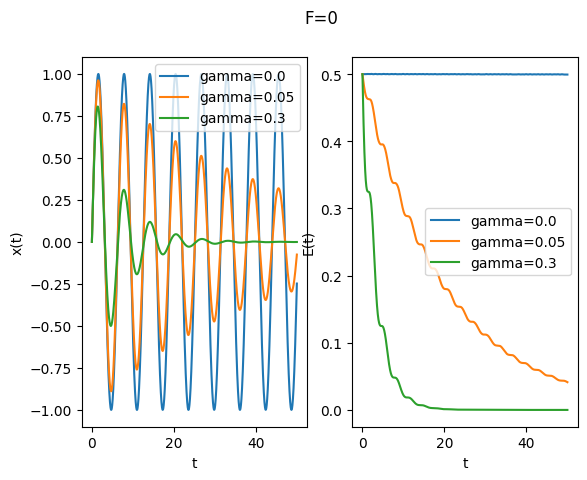

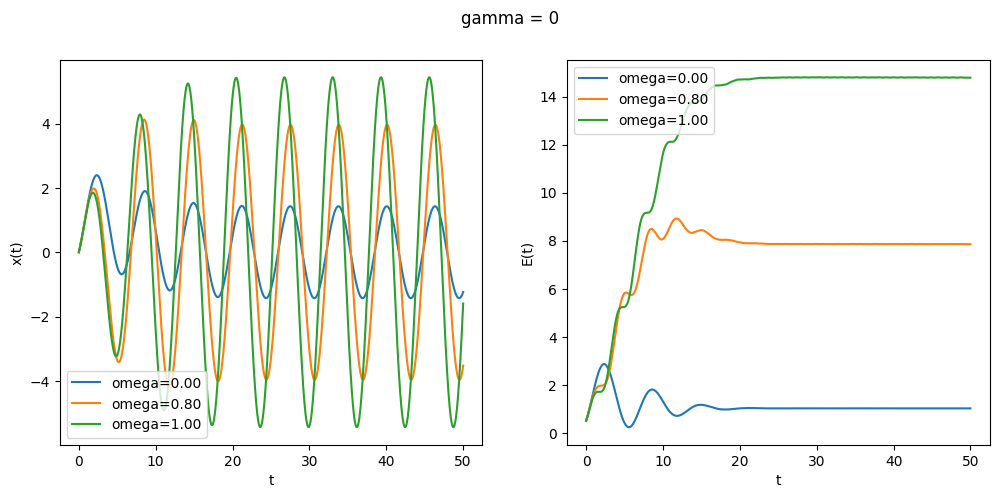

In [65]:
m = 1
k = 1
w0 = np.sqrt(k/m)

def E(x, v):
    return 0.5*m*v**2 + 0.5*k*x**2

def f(t, y, gamma, m, w0):
    x, v = y
    dxdt = v
    dvdt = -gamma*v - w0**2*x
    return [dxdt, dvdt]
gammas = [0.0, 0.05, 0.3]
t_span = [0, 50]
t_eval = np.linspace(0,50, 5000)

for g in gammas:
    sol = solve_ivp(f, t_span, [0,1], args=(g,m,w0), t_eval=t_eval)
    x, v = sol.y
    energy = E(x,v)

    plt.subplot(1,2,1)
    plt.plot(sol.t, x, label=f'gamma={g}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(sol.t, energy, label=f'gamma={g}')
    plt.xlabel('t')
    plt.ylabel('E(t)')
    plt.legend()
plt.suptitle('F=0')
plt.show()

#Si gamma = 0
F0 = 1
T = 10

def F_t(t, w):
    return F0*np.cos(w*t)*np.exp(-(t**2)/(T**2))

def f2(t, y, m, w0, w):
    x, v = y
    dxdt = v
    dvdt = F_t(t, w)/m - w0**2 * x
    return [dxdt, dvdt]

omegas = [0.0, 0.8*w0, w0]

plt.figure(figsize=(12,5))
for w in omegas:
    sol = solve_ivp(f2, t_span, [0, 1], args=(m, w0, w), t_eval=t_eval)
    x, v = sol.y
    energy = E(x, v)

    plt.subplot(1,2,1)
    plt.plot(sol.t, x, label=f'omega={w:.2f}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(sol.t, energy, label=f'omega={w:.2f}')
    plt.xlabel('t')
    plt.ylabel('E(t)')
    plt.legend()

plt.subplot(1,2,1)
plt.subplot(1,2,2)
plt.suptitle('gamma = 0')
plt.show()

# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [8]:
#Aquí va su código

# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


In [9]:
def jeans(t, y, k):
    sigma, dsigma_dt = y
    d2sigma_dt2 = -k**2 * sigma
    return [dsigma_dt, d2sigma_dt2]

In [10]:
r=8.0 * 3.085677581e19
Vo=2.2e5
omega=Vo/r
k=np.sqrt(2)*omega
sigma_0 = 1.0
dsigma_dt_0 = 0.0

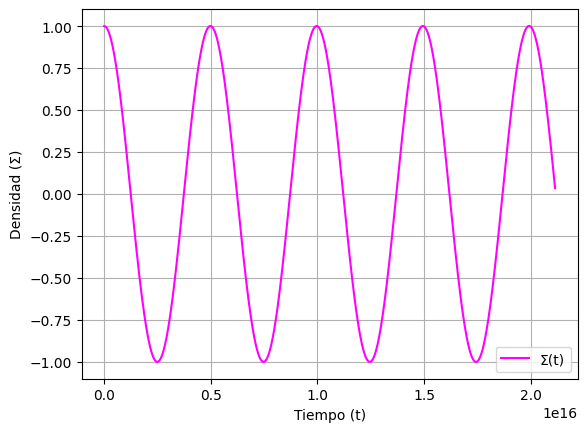

In [11]:
y0 = [sigma_0, dsigma_dt_0]
T=2*np.pi/omega
t_span = [0, 3*T]
t_eval = np.linspace(1, 3*T, 10000)

sol = solve_ivp(jeans, t_span, y0, t_eval=t_eval, args=(k,))

t = sol.t
sigma = sol.y[0]
dsigma_dt = sol.y[1]

plt.plot(t, sigma, color="magenta",label='Σ(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Densidad (Σ)')
plt.legend()
plt.grid()
plt.show()

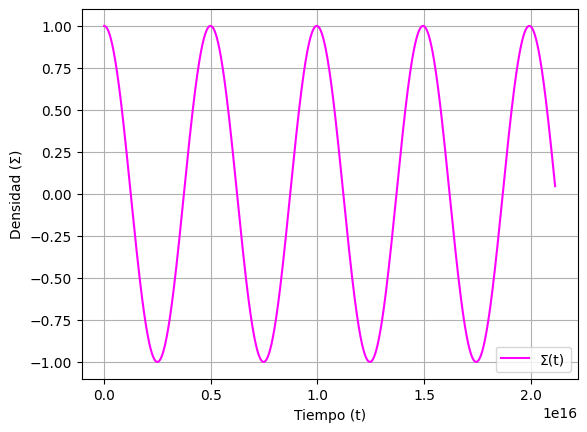

In [12]:
sigma=lambda t:sigma_0*np.cos(k*t)+dsigma_dt_0/k*np.sin(k*t)
t=np.linspace(1,3*T,10000)

plt.plot(t, sigma(t), color="magenta",label='Σ(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Densidad (Σ)')
plt.legend()
plt.grid()
plt.show()
#Comparando el metodo con la solucion analitica, vemos que los resultados son casi identicos

In [13]:
M=np.array([[0,1],[-k**2,0]])
print(la.eigvals(M))
#Notese que los auto valores tienen la misma componente real con diferente signo

[0.+1.26036736e-15j 0.-1.26036736e-15j]


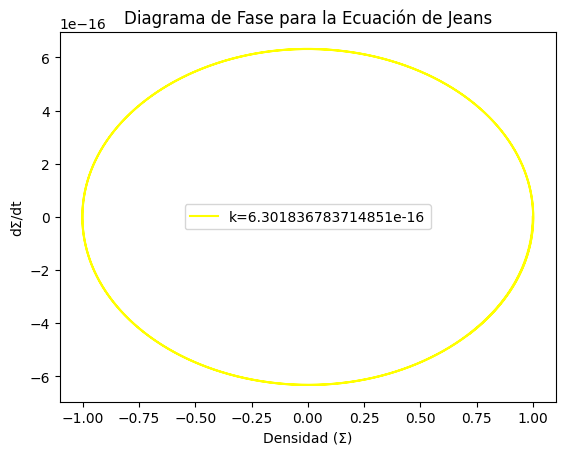

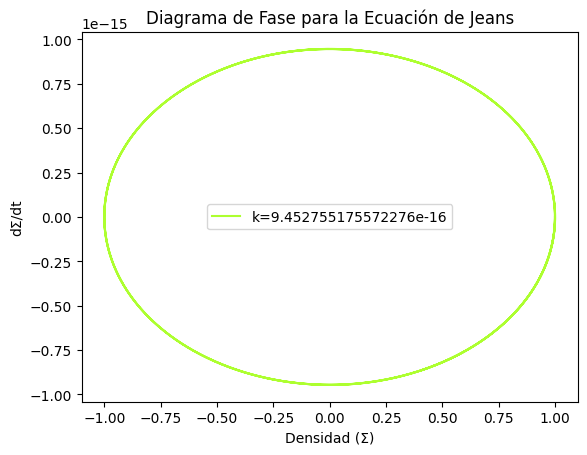

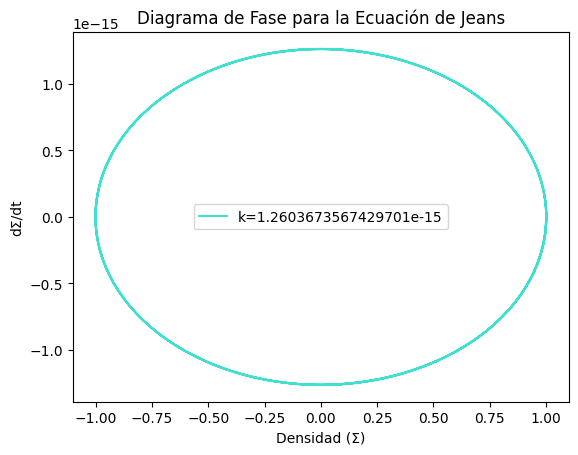

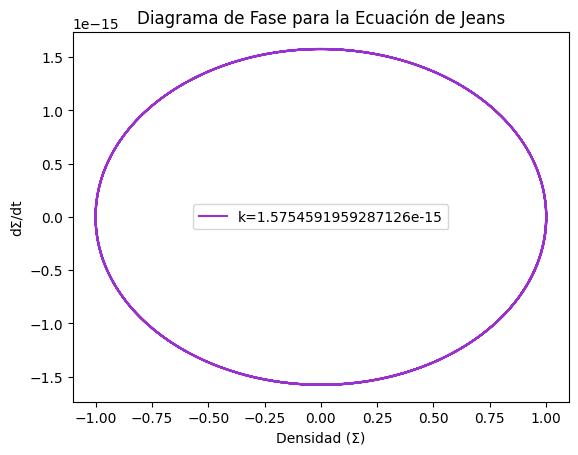

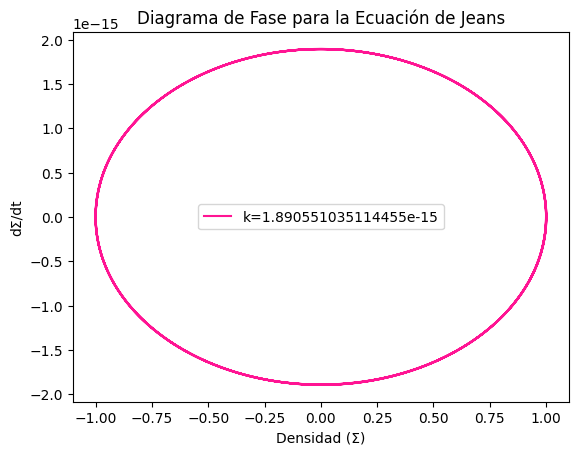

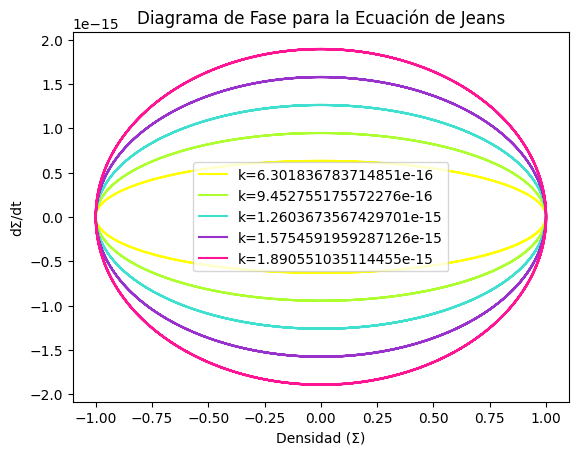

In [14]:
for i in range(5):
  k_=np.linspace((1/2)*np.sqrt(2)*omega,(3/2)*np.sqrt(2)*omega,5)
  y0 = [sigma_0, dsigma_dt_0]
  T=2*np.pi/omega
  t_span = [0, 3*T]
  t_eval = np.linspace(1, 3*T, 10000)
  colors=["yellow","greenyellow","turquoise","darkorchid","deeppink"]

  sol = solve_ivp(jeans, t_span, y0, t_eval=t_eval, args=(k_[i],))

  t = sol.t
  sigma = sol.y[0]
  dsigma_dt = sol.y[1]

  plt.plot(sol.y[0], sol.y[1], color=colors[i], label=f'k={k_[i]}')
  plt.title('Diagrama de Fase para la Ecuación de Jeans')
  plt.xlabel('Densidad (Σ)')
  plt.ylabel('dΣ/dt')
  plt.legend()
  plt.grid(False)
  plt.show()

for j in range(5):
  sol = solve_ivp(jeans, t_span, y0, t_eval=t_eval, args=(k_[j],))
  plt.plot(sol.y[0], sol.y[1], color=colors[j], label=f'k={k_[j]}')
plt.title('Diagrama de Fase para la Ecuación de Jeans')
plt.xlabel('Densidad (Σ)')
plt.ylabel('dΣ/dt')
plt.legend()
plt.grid(False)
plt.show()
#El sistema se mantiene estable incluso cuando se cambia el valor de k

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

In [15]:
def f(x):
  omega = 2.0
  return -omega**2 * x

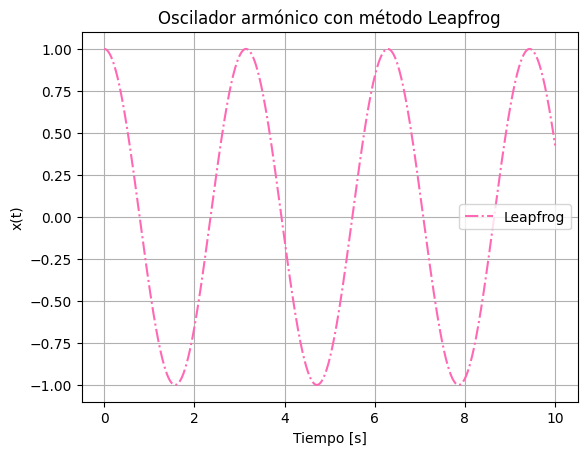

In [16]:
omega = 2.0
h = 0.01
x0 = 1.0
v0 = 0.0

t = np.linspace(0, 10, 1000)
x = np.zeros(1000)
v = np.zeros(1000)

x[0] = x0
v[0] = v0

v_half = v[0] + 0.5 * f(x[0]) * h #Usaremos esto como paso inicial

for i in range(len(t)-1):
  #Esta funcion actualiza el valor Vn para cada instante de tiempo (paso h)
  x[i+1] = x[i] + v_half * h
  v_half = v_half + f(x[i+1]) * h
  v[i+1] = v_half - 0.5 * f(x[i+1]) * h

plt.plot(t, x, color="hotpink", ls ="-.", label="Leapfrog")
plt.title("Oscilador armónico con método Leapfrog")
plt.xlabel("Tiempo [s]")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()